# Imports and Setup

In [1]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Embeddings laden 

In [4]:
embeddings_path = "..\data\esmc-embeddings\embeddings_complete.npz"
data = np.load(embeddings_path, allow_pickle=True)

# Extracting the embeddings and labels
X = data['embeddings']
y = data['labels']

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Tim\AppData\Local\Temp\ipykernel_36316\836710936.py:1: SyntaxWarning: invalid escape sequence '\d'
  embeddings_path = "..\data\esmc-embeddings\embeddings_complete.npz"


In [2]:
embeddings_path = "../data/esmc-embeddings/embeddings_complete_6B_55.npz"
data = np.load(embeddings_path, allow_pickle=True)

# Extracting the embeddings and labels
X = data['embeddings']
y = data['labels']

In [5]:
# Überprüfe die Form der Embeddings
print("Form der Embeddings:", X.shape)  # Sollte (1250, 31, 960) sein

# Verschiedene Strategien zum Extrahieren von Features

# 1. Frühes Layer (z.B. erstes Element in der Sequenz)
X_early = X[:, 0, :]
print("Form des frühen Layers:", X_early.shape)

# 2. Mittleres Layer (mittleres Element in der Sequenz)
middle_idx = X.shape[1] // 2
X_middle = X[:, middle_idx, :]
print("Form des mittleren Layers:", X_middle.shape)

# 3. Spätes Layer (letztes Element in der Sequenz)
X_late = X[:, -1, :]
print("Form des späten Layers:", X_late.shape)

# 4. Durchschnitt über alle drei Ansätze
X_avg = np.mean(np.stack([X_early, X_middle, X_late]), axis=0)
print("Form des gemittelten Layers:", X_avg.shape)

Form der Embeddings: (1250, 31, 960)
Form des frühen Layers: (1250, 960)
Form des mittleren Layers: (1250, 960)
Form des späten Layers: (1250, 960)
Form des gemittelten Layers: (1250, 960)


In [6]:
# Liste der verschiedenen Feature-Sets
feature_sets = {
    "Frühes Layer": X_early,
    "Mittleres Layer": X_middle,
    "Spätes Layer": X_late,
    "Gemittelt": X_avg
}

# Ergebnisse speichern
results = {}

# Jedes Feature-Set trainieren und evaluieren
for name, features in feature_sets.items():
    print(f"\n=== Training mit {name} ===")
    
    # Daten aufteilen
    X_train, X_test, y_train, y_test = train_test_split(
        features, y, test_size=0.2, random_state=42
    )

    # MLP trainieren
    mlp = MLPClassifier(
        hidden_layer_sizes=(50,),
        activation='relu',
        alpha=0.0001,
        solver='sgd',
        learning_rate='adaptive',
        learning_rate_init=0.01,
        max_iter=300,
        random_state=42,
        verbose=True
    )

    mlp.fit(X_train, y_train)

    # Vorhersagen machen und evaluieren
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Genauigkeit: {accuracy:.4f}")
    print("Klassifikationsbericht:")
    print(report)

    # Ergebnisse speichern
    results[name] = {
        "accuracy": accuracy,
        "report": report,
        "model": mlp
    }

# Zusammenfassung anzeigen
print("\n=== Zusammenfassung ===")
for name, result in results.items():
    print(f"{name}: Genauigkeit = {result['accuracy']:.4f}")


=== Training mit Frühes Layer ===
Iteration 1, loss = 1.10993117
Iteration 2, loss = 1.08837344
Iteration 3, loss = 1.07461064
Iteration 4, loss = 1.06731883
Iteration 5, loss = 1.06159846
Iteration 6, loss = 1.05847955
Iteration 7, loss = 1.05336430
Iteration 8, loss = 1.04952093
Iteration 9, loss = 1.04721447
Iteration 10, loss = 1.04639649
Iteration 11, loss = 1.04338202
Iteration 12, loss = 1.04185492
Iteration 13, loss = 1.04014558
Iteration 14, loss = 1.03940954
Iteration 15, loss = 1.03814343
Iteration 16, loss = 1.03562668
Iteration 17, loss = 1.03605389
Iteration 18, loss = 1.03586645
Iteration 19, loss = 1.03426202
Iteration 20, loss = 1.03259258
Iteration 21, loss = 1.03504790
Iteration 22, loss = 1.03093126
Iteration 23, loss = 1.03068891
Iteration 24, loss = 1.03271594
Iteration 25, loss = 1.03343389
Iteration 26, loss = 1.02957514
Iteration 27, loss = 1.03044415
Iteration 28, loss = 1.02976656
Iteration 29, loss = 1.02770650
Iteration 30, loss = 1.02976771
Iteration 31, 

C:\Users\Tim\Desktop\bold-binders\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 1.07755421
Iteration 39, loss = 1.07755380
Iteration 40, loss = 1.07755465
Iteration 41, loss = 1.07755571
Iteration 42, loss = 1.07755420
Iteration 43, loss = 1.07755491
Iteration 44, loss = 1.07755423
Iteration 45, loss = 1.07755457
Iteration 46, loss = 1.07755472
Iteration 47, loss = 1.07755492
Iteration 48, loss = 1.07755552
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000080
Iteration 49, loss = 1.07755371
Iteration 50, loss = 1.07755379
Iteration 51, loss = 1.07755441
Iteration 52, loss = 1.07755377
Iteration 53, loss = 1.07755400
Iteration 54, loss = 1.07755382
Iteration 55, loss = 1.07755353
Iteration 56, loss = 1.07755366
Iteration 57, loss = 1.07755356
Iteration 58, loss = 1.07755369
Iteration 59, loss = 1.07755371
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000016
Iteration 60, loss = 1.07755352
Iteration 61, loss = 1.07755355
Iter

C:\Users\Tim\Desktop\bold-binders\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Tim\Desktop\bold-binders\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Tim\Desktop\bold-binders\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

Iteration 23, loss = 1.03759627
Iteration 24, loss = 1.03611377
Iteration 25, loss = 1.03495967
Iteration 26, loss = 1.03365453
Iteration 27, loss = 1.03211164
Iteration 28, loss = 1.03099704
Iteration 29, loss = 1.03026130
Iteration 30, loss = 1.02887759
Iteration 31, loss = 1.02780170
Iteration 32, loss = 1.02692199
Iteration 33, loss = 1.02624662
Iteration 34, loss = 1.02520471
Iteration 35, loss = 1.02440421
Iteration 36, loss = 1.02397308
Iteration 37, loss = 1.02328504
Iteration 38, loss = 1.02260954
Iteration 39, loss = 1.02214820
Iteration 40, loss = 1.02174144
Iteration 41, loss = 1.02132767
Iteration 42, loss = 1.02076012
Iteration 43, loss = 1.02038736
Iteration 44, loss = 1.01999067
Iteration 45, loss = 1.01957135
Iteration 46, loss = 1.01924953
Iteration 47, loss = 1.01901034
Iteration 48, loss = 1.01869602
Iteration 49, loss = 1.01832292
Iteration 50, loss = 1.01807847
Iteration 51, loss = 1.01799363
Iteration 52, loss = 1.01745224
Iteration 53, loss = 1.01720357
Iteratio

C:\Users\Tim\Desktop\bold-binders\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 30, loss = 1.03084006
Iteration 31, loss = 1.02687692
Iteration 32, loss = 1.02096567
Iteration 33, loss = 1.02164304
Iteration 34, loss = 1.01775984
Iteration 35, loss = 1.01477390
Iteration 36, loss = 1.03098154
Iteration 37, loss = 1.02020440
Iteration 38, loss = 1.01403259
Iteration 39, loss = 1.01356926
Iteration 40, loss = 1.01893620
Iteration 41, loss = 1.02279188
Iteration 42, loss = 1.01625058
Iteration 43, loss = 1.01519388
Iteration 44, loss = 1.00690686
Iteration 45, loss = 1.00822405
Iteration 46, loss = 1.00926591
Iteration 47, loss = 1.01900281
Iteration 48, loss = 1.01866233
Iteration 49, loss = 1.00536112
Iteration 50, loss = 1.00059870
Iteration 51, loss = 1.00699031
Iteration 52, loss = 1.00820871
Iteration 53, loss = 0.99898371
Iteration 54, loss = 1.01294141
Iteration 55, loss = 0.99974085
Iteration 56, loss = 1.02464240
Iteration 57, loss = 1.00303731
Iteration 58, loss = 1.00653902
Iteration 59, loss = 1.00173468
Iteration 60, loss = 0.99584492
Iteratio

C:\Users\Tim\Desktop\bold-binders\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Tim\Desktop\bold-binders\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Tim\Desktop\bold-binders\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01]
}

mlp = MLPClassifier(max_iter=500)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

# Beste Parameter ausgeben
print("Beste Parameter:", clf.best_params_)


=== Training mit Frühes Layer ===
Iteration 1, loss = 1.19279373
Iteration 2, loss = 1.16086682
Iteration 3, loss = 1.12256237
Iteration 4, loss = 1.09237322
Iteration 5, loss = 1.06870412
Iteration 6, loss = 1.04976444
Iteration 7, loss = 1.03552822
Iteration 8, loss = 1.02305871
Iteration 9, loss = 1.01362214
Iteration 10, loss = 1.00421771
Iteration 11, loss = 0.99612450
Iteration 12, loss = 0.98899968
Iteration 13, loss = 0.98235293
Iteration 14, loss = 0.97654689
Iteration 15, loss = 0.97053721
Iteration 16, loss = 0.96573012
Iteration 17, loss = 0.96108861
Iteration 18, loss = 0.95664529
Iteration 19, loss = 0.95227368
Iteration 20, loss = 0.94822337
Iteration 21, loss = 0.94446553
Iteration 22, loss = 0.94060622
Iteration 23, loss = 0.93714628
Iteration 24, loss = 0.93354448
Iteration 25, loss = 0.93022458
Iteration 26, loss = 0.92720591
Iteration 27, loss = 0.92428489
Iteration 28, loss = 0.92138422
Iteration 29, loss = 0.91823601
Iteration 30, loss = 0.91543139
Iteration 31, 

C:\Users\Tim\Desktop\bold-binders\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


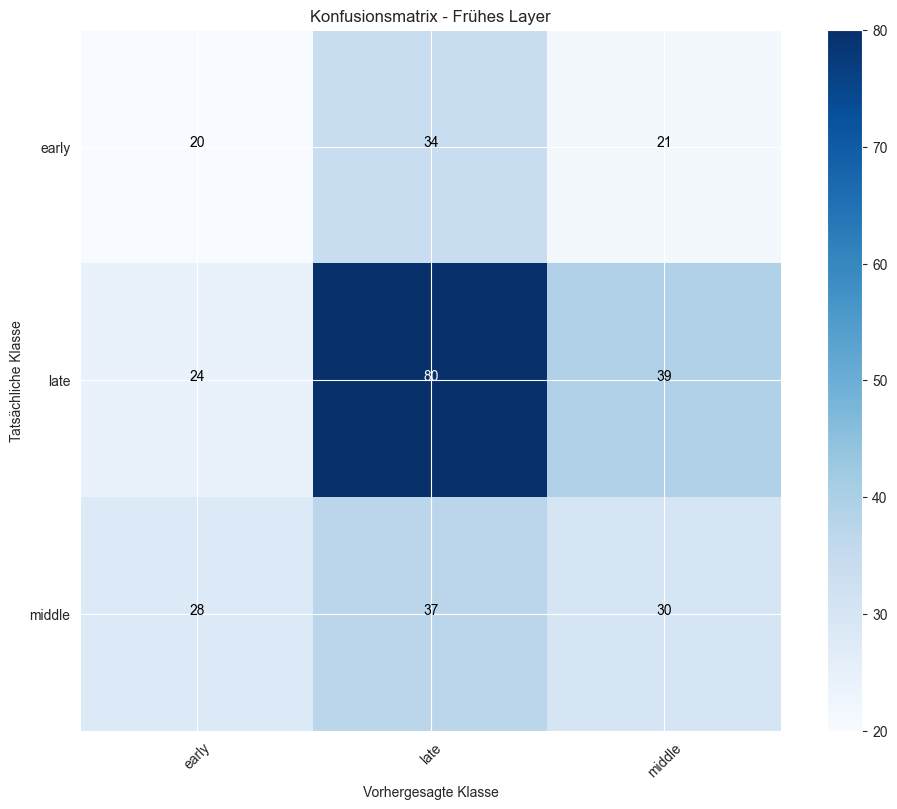

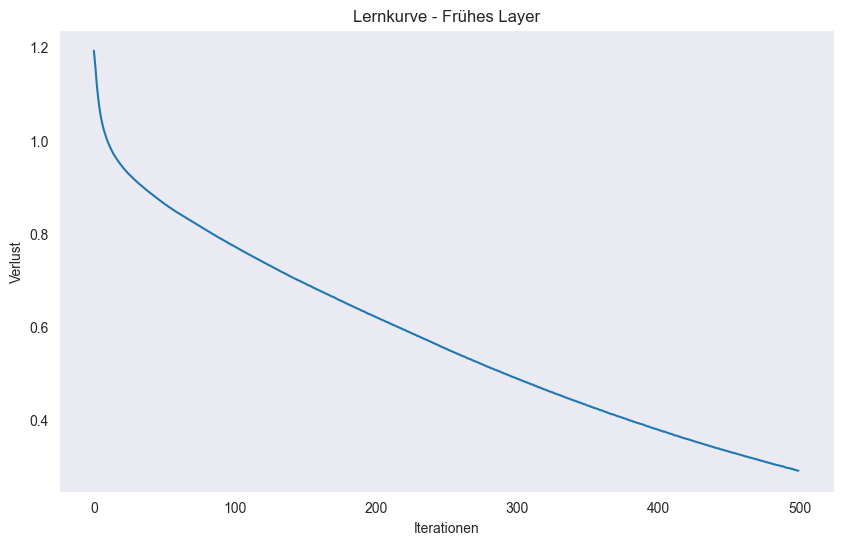

Modell wurde als 'mlp_modell_frühes_layer.pkl' gespeichert

=== Training mit Mittleres Layer ===
Iteration 1, loss = 1.19666140
Iteration 2, loss = 1.16930288
Iteration 3, loss = 1.13534033
Iteration 4, loss = 1.10403130
Iteration 5, loss = 1.08055528
Iteration 6, loss = 1.06026507
Iteration 7, loss = 1.04315975
Iteration 8, loss = 1.02917992
Iteration 9, loss = 1.01640653
Iteration 10, loss = 1.00550563
Iteration 11, loss = 0.99581148
Iteration 12, loss = 0.98686857
Iteration 13, loss = 0.97831457
Iteration 14, loss = 0.97058608
Iteration 15, loss = 0.96268930
Iteration 16, loss = 0.95520990
Iteration 17, loss = 0.94814260
Iteration 18, loss = 0.94121718
Iteration 19, loss = 0.93443064
Iteration 20, loss = 0.92785118
Iteration 21, loss = 0.92151397
Iteration 22, loss = 0.91535830
Iteration 23, loss = 0.90907677
Iteration 24, loss = 0.90332217
Iteration 25, loss = 0.89738167
Iteration 26, loss = 0.89183207
Iteration 27, loss = 0.88602363
Iteration 28, loss = 0.88055256
Iteration 29, lo

C:\Users\Tim\Desktop\bold-binders\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


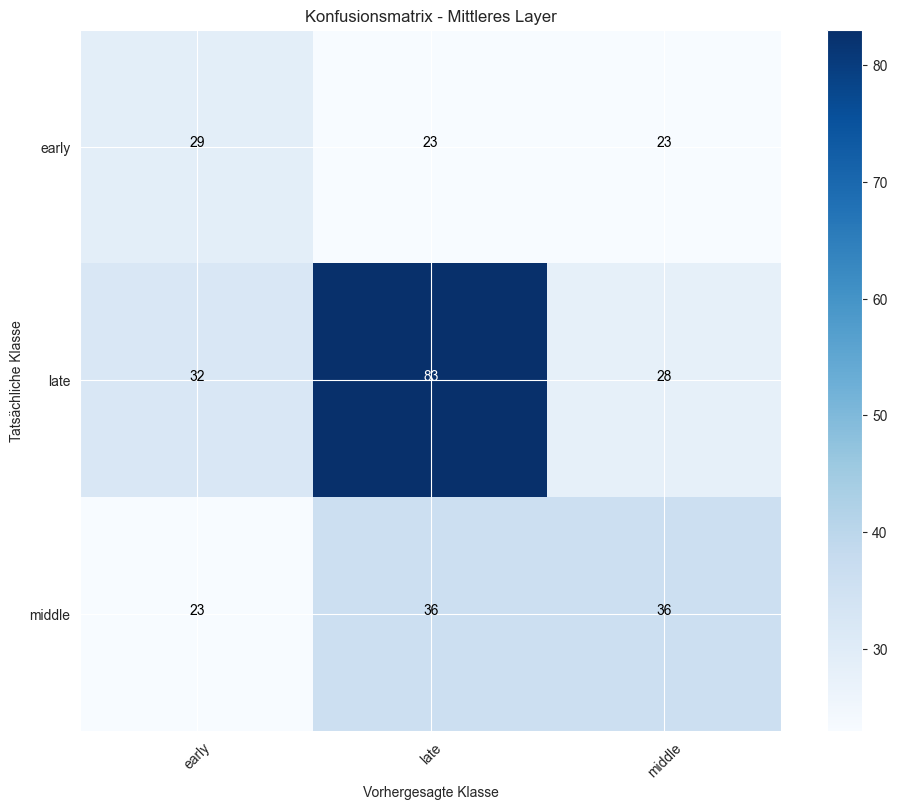

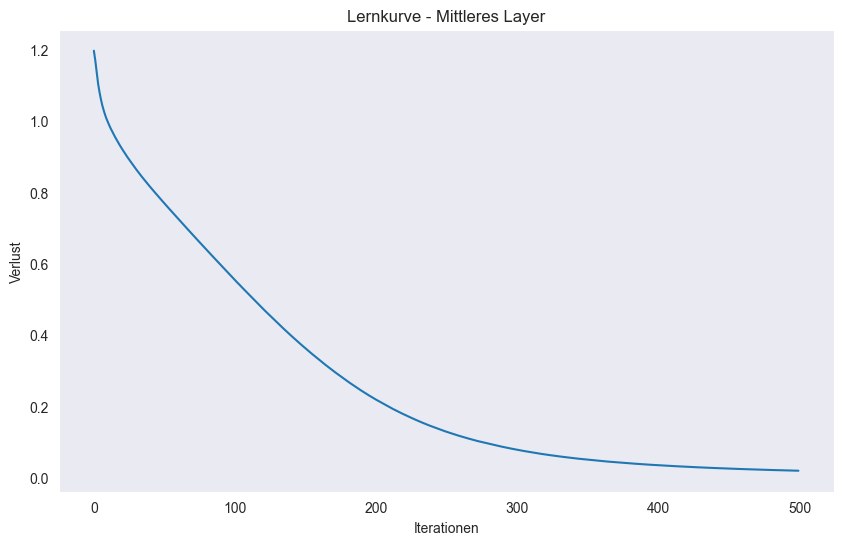

Modell wurde als 'mlp_modell_mittleres_layer.pkl' gespeichert

=== Training mit Spätes Layer ===
Iteration 1, loss = 1.19919283
Iteration 2, loss = 1.16468233
Iteration 3, loss = 1.12320010
Iteration 4, loss = 1.08717462
Iteration 5, loss = 1.06069153
Iteration 6, loss = 1.03892481
Iteration 7, loss = 1.02193840
Iteration 8, loss = 1.00735302
Iteration 9, loss = 0.99468965
Iteration 10, loss = 0.98364355
Iteration 11, loss = 0.97384103
Iteration 12, loss = 0.96461527
Iteration 13, loss = 0.95628646
Iteration 14, loss = 0.94833158
Iteration 15, loss = 0.94058417
Iteration 16, loss = 0.93319925
Iteration 17, loss = 0.92632393
Iteration 18, loss = 0.91982892
Iteration 19, loss = 0.91308924
Iteration 20, loss = 0.90672203
Iteration 21, loss = 0.90071095
Iteration 22, loss = 0.89477636
Iteration 23, loss = 0.88894290
Iteration 24, loss = 0.88299537
Iteration 25, loss = 0.87729337
Iteration 26, loss = 0.87206598
Iteration 27, loss = 0.86675489
Iteration 28, loss = 0.86140067
Iteration 29, lo

C:\Users\Tim\Desktop\bold-binders\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


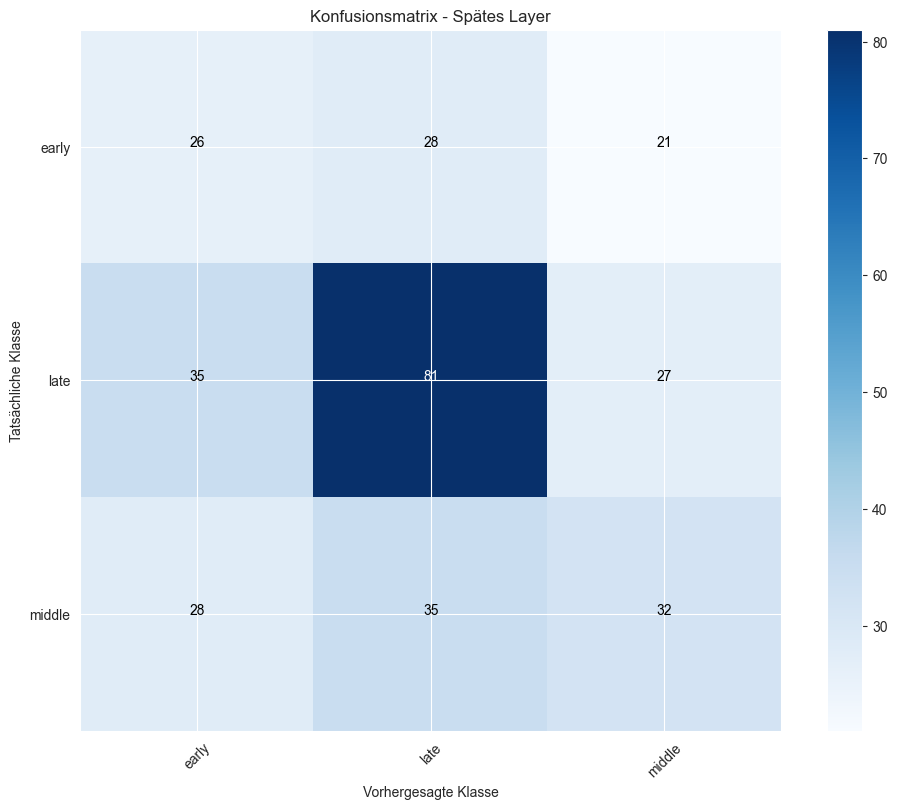

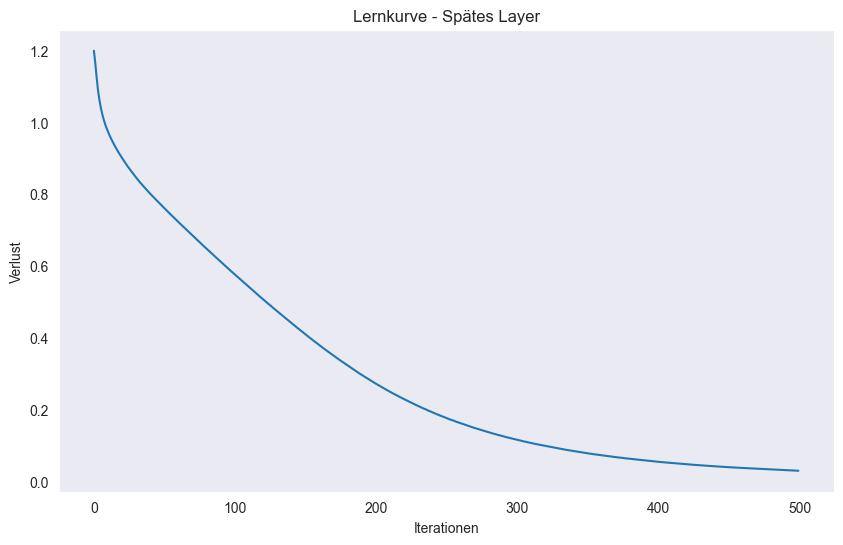

Modell wurde als 'mlp_modell_spätes_layer.pkl' gespeichert

=== Training mit Gemittelt ===
Iteration 1, loss = 1.19445444
Iteration 2, loss = 1.16613634
Iteration 3, loss = 1.13144911
Iteration 4, loss = 1.09984495
Iteration 5, loss = 1.07581886
Iteration 6, loss = 1.05510238
Iteration 7, loss = 1.03780864
Iteration 8, loss = 1.02380259
Iteration 9, loss = 1.01088686
Iteration 10, loss = 0.99976490
Iteration 11, loss = 0.98973110
Iteration 12, loss = 0.98067002
Iteration 13, loss = 0.97194185
Iteration 14, loss = 0.96406627
Iteration 15, loss = 0.95590470
Iteration 16, loss = 0.94838049
Iteration 17, loss = 0.94131044
Iteration 18, loss = 0.93436818
Iteration 19, loss = 0.92751805
Iteration 20, loss = 0.92089006
Iteration 21, loss = 0.91454165
Iteration 22, loss = 0.90832082
Iteration 23, loss = 0.90205607
Iteration 24, loss = 0.89617532
Iteration 25, loss = 0.89019930
Iteration 26, loss = 0.88461329
Iteration 27, loss = 0.87875442
Iteration 28, loss = 0.87335288
Iteration 29, loss = 0

C:\Users\Tim\Desktop\bold-binders\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


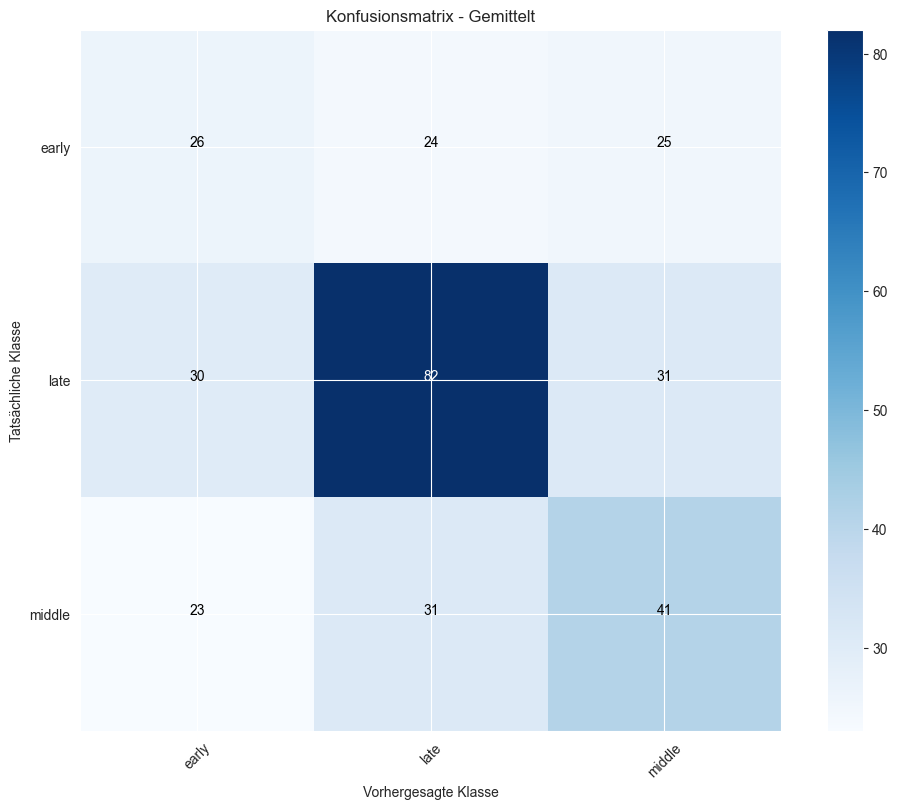

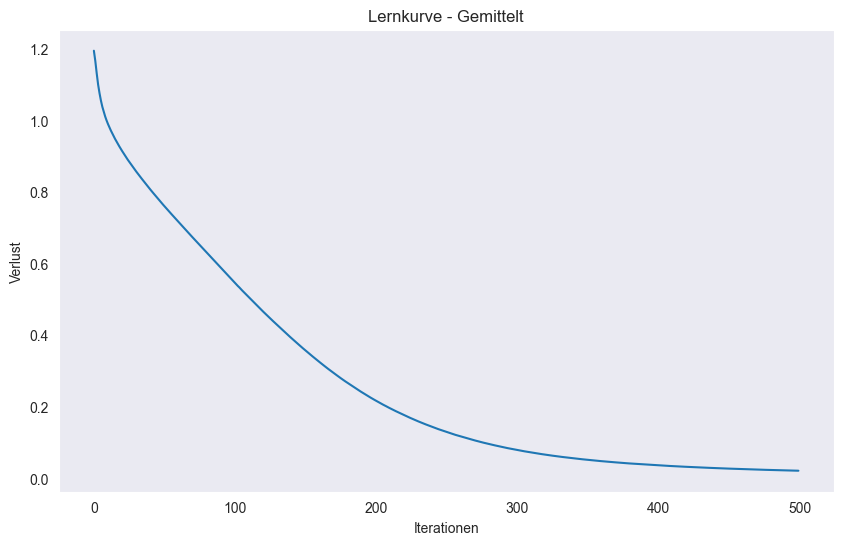

Modell wurde als 'mlp_modell_gemittelt.pkl' gespeichert

=== Zusammenfassung ===
Frühes Layer: Genauigkeit = 0.4153
Mittleres Layer: Genauigkeit = 0.4728
Spätes Layer: Genauigkeit = 0.4441
Gemittelt: Genauigkeit = 0.4760

Bestes Modell: Gemittelt mit Genauigkeit 0.4760


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Liste der verschiedenen Feature-Sets
feature_sets = {
    "Frühes Layer": X_early,
    "Mittleres Layer": X_middle,
    "Spätes Layer": X_late,
    "Gemittelt": X_avg
}

# Ergebnisse speichern
results = {}

# Jedes Feature-Set trainieren und evaluieren
for name, features in feature_sets.items():
    print(f"\n=== Training mit {name} ===")
    
    start_time = time.time()

    # Hier features statt X verwenden (2D statt 3D)
    X_train, X_test, y_train, y_test = train_test_split(
        features, y, test_size=0.25, random_state=42
    )
    
    # Daten standardisieren
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Die besten Parameter aus dem vorherigen GridSearch verwenden
    best_mlp = MLPClassifier(
        hidden_layer_sizes=(50, 50),
        activation='relu',
        alpha=0.0001,
        solver='sgd',
        learning_rate='constant',
        learning_rate_init=0.001,
        max_iter=500,
        random_state=42,
        verbose=True
    )
    
    # Modell trainieren
    best_mlp.fit(X_train_scaled, y_train)
    
    # Dauer berechnen
    duration = time.time() - start_time
    print(f"Training dauerte {duration:.2f} Sekunden")
    
    # Vorhersagen machen
    y_pred = best_mlp.predict(X_test_scaled)
    
    # Evaluation
    print(f"\nGenauigkeit auf Testdaten: {best_mlp.score(X_test_scaled, y_test):.4f}")
    print("\nKlassifikationsbericht:")
    print(classification_report(y_test, y_pred))

    # Konfusionsmatrix visualisieren
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Konfusionsmatrix - {name}")
    plt.colorbar()
    classes = np.unique(y_test)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Werte in der Matrix anzeigen
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Tatsächliche Klasse')
    plt.xlabel('Vorhergesagte Klasse')
    plt.show()

    # Lernkurve visualisieren
    if hasattr(best_mlp, 'loss_curve_'):
        plt.figure(figsize=(10, 6))
        plt.plot(best_mlp.loss_curve_)
        plt.title(f'Lernkurve - {name}')
        plt.xlabel('Iterationen')
        plt.ylabel('Verlust')
        plt.grid()
        plt.show()

    # Ergebnisse speichern
    results[name] = {
        "accuracy": best_mlp.score(X_test_scaled, y_test),
        "model": best_mlp
    }

    # Modell speichern
    joblib.dump(best_mlp, f'mlp_modell_{name.replace(" ", "_").lower()}.pkl')
    print(f"Modell wurde als 'mlp_modell_{name.replace(' ', '_').lower()}.pkl' gespeichert")

# Zusammenfassung anzeigen
print("\n=== Zusammenfassung ===")
for name, result in results.items():
    print(f"{name}: Genauigkeit = {result['accuracy']:.4f}")

# Das beste Modell identifizieren
best_name = max(results, key=lambda k: results[k]["accuracy"])
print(f"\nBestes Modell: {best_name} mit Genauigkeit {results[best_name]['accuracy']:.4f}")